<a href="https://colab.research.google.com/github/sriharshan136/Sentiment-Analysis-of-IMDb-Reviews/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis of IMDB Movie Reviews**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: [Kaggle.com: IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews)

In [ ]:
data=pd.read_csv("/content/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
data = data.loc[:10000] #Subset of the whole dataset

In [ ]:
#Marking reviews with "positive" sentiment as 1 and "negative" sentiment as 0 in a new column
def add_label(state):
  if "positive" in state:
    return 1
  else:
    return 0
data['label'] = data['sentiment'].apply(add_label)
data.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


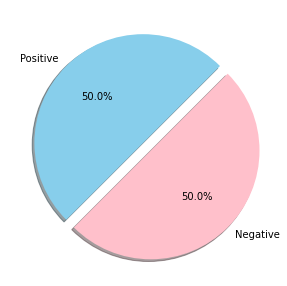

In [ ]:
#Visualize the distribution of the data

fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [ ]:
#Data cleaning and preprocessing

import re
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')
             text = text.split()
             text = [porter.stem(word) for word in text if not word in stop]
             text = ' '.join(text)
             return text
data['review']=data['review'].apply(preprocessor)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,label
0,one review mention watch 1 oz episod hook righ...,positive,1
1,wonder littl product film techniqu unassum old...,positive,1
2,thought wonder way spend time hot summer weeke...,positive,1
3,basic famili littl boy jake think zombi closet...,negative,0
4,petter mattei love time money visual stun film...,positive,1


In [ ]:
data['review'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


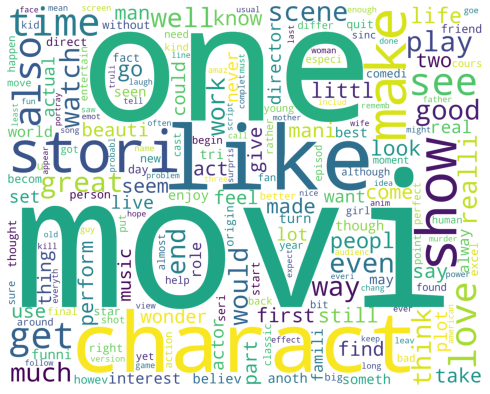

Negative words are as follows


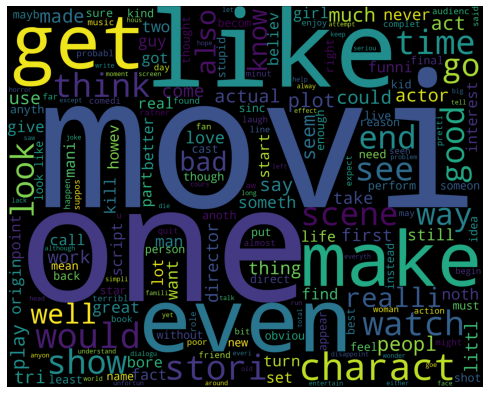

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['review']
negdata = data[data['label'] == 0]
negdata= negdata['review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

**Implementing Multinomial Naive Bayes From Scratch**

In [ ]:
import numpy as np

class MNNaiveBayes:

  def __init__(self, k=0.5):
    self.k = k
    self.cat0_count = 0
    self.cat1_count = 0
    self.total_count = self.cat0_count + self.cat1_count
    self.cat_0_prior = 0
    self.cat_1_prior = 0
    self.cat_0_prior, self.cat_1_prior
    self.word_probs = []
    self.vocab = []

  def tokenize(self, document):

    doc = document.lower()
    # remove non-alpha characters
    stop_chars = '''0123456789!()-[]{};:'"\,<>./?@#$%^&*_~'''

    tokens = ""
    # iterate through and make each token
    for char in doc:
      if char not in stop_chars:
        tokens += char

    return tokens.split() # now a list of tokens

  def count_words(self, X, y):
    counts = {}
    # need to figure our this loop, want to iterate over both of them, I see why it was paired before
    for document, category in zip(X, y):
        for token in self.tokenize(document):
          # Initialize a dict entry with 0 counts
          if token not in counts:
            counts[token] = [0,0]
          # Now that it exists, add to the category count for that word
          counts[token][category] += 1
    return counts

  def prior_prob(self, counts):

    # Iterate through counts dict and add up each word count by category
    cat0_word_count = cat1_word_count = 0
    for word, (cat0_count, cat1_count) in counts.items():
        cat0_word_count += cat0_count
        cat1_word_count += cat1_count

    # save attributes to the class
    self.cat0_count = cat0_word_count
    self.cat1_count = cat1_word_count
    self.total_count = self.cat0_count + self.cat1_count

    # Get the prior prob by dividing words in each cat by total words
    cat_0_prior = cat0_word_count / self.total_count
    cat_1_prior = cat1_word_count / self.total_count
    return cat_0_prior, cat_1_prior

  def word_probabilities(self, counts):
    """turn the word_counts into a list of triplets
    word, p(w | cat0), and p(w | cat1)"""
    # Here we apply the smoothing term, self.k, so that words that aren't in
    # the category don't get calculated as 0
    self.vocab = [word for word, (cat0, cat1) in counts.items()]
    return [(word,
    (cat0 + self.k) / (self.cat0_count + 2 * self.k),
    (cat1 + self.k) / (self.cat1_count + 2 * self.k))
    for word, (cat0, cat1) in counts.items()]

  def fit(self, X, y):
    # Take all these functions and establish probabilities of input
    counts = self.count_words(X, y)
    self.cat_0_prior, self.cat_1_prior = self.prior_prob(counts)
    self.word_probs = self.word_probabilities(counts)

  def predict(self, test_corpus):
    y_pred = []
    for document in test_corpus:
      # Every document get their own prediction probability
      log_prob_cat0 = log_prob_cat1 = 0.0
      tokens = self.tokenize(document)
      for word, prob_cat0, prob_cat1 in self.word_probs:
        if word in tokens:
          # Because of 'overflow' best to add the log probs together and exp
          log_prob_cat0 += np.log(prob_cat0)
          log_prob_cat1 += np.log(prob_cat1)
        # get each of the category predictions including the prior
      cat_0_pred = self.cat_0_prior * np.exp(log_prob_cat0)
      cat_1_pred = self.cat_1_prior * np.exp(log_prob_cat1)
      if cat_0_pred >= cat_1_pred:
        y_pred.append(0)
      else:
        y_pred.append(1)
    return y_pred

In [ ]:
sub_data = data.loc[:10000] #Subset of the whole dataset

x = sub_data.review.values
y = sub_data.label.values
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, random_state=0, test_size=0.5, shuffle=False)

# Training model using user defined Multinomial Naive bayes classifier

obj1 = MNNaiveBayes()
model= obj1.fit(X_train,y_train)
y_pred = obj1.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
conf_matr = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion matrix:")
print(conf_matr)
print("Accuracy(%): ",accuracy*100)

Confusion matrix:
[[2264  177]
 [1210 1350]]
Accuracy(%):  72.26554689062188


**Naive Bayes Classifiers**

In [ ]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(max_features=2500)
count.fit(data.review)
cv_X = count.transform(data.review).toarray()
cv_y = data.label.values

# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cv_X, cv_y, random_state=0, test_size=0.5, shuffle=False)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_naive = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_naive.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
conf_matr = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion matrix:")
print(conf_matr)
print("Accuracy(%): ",accuracy*100)

Confusion matrix:
[[10432  2042]
 [ 1949 10577]]
Accuracy(%):  84.036


In [ ]:
# Checking the sentiment of the review using Naive Bayes Model
def check_sentiment_nb(review):
  pred_sentiment = obj1.predict(review)
  return check(pred_sentiment)

def check(pred_sentiment):
  result = []
  for i in pred_sentiment:
    if i == 1:
      result.append('positive')
    else:
      result.append('negative')
  return result

In [ ]:
test_review = ['The movie is Amazing!','Bad, the show is very Bad!!']

print("Naive Bayes Classifiers: ", check_sentiment_nb(test_review))

Naive Bayes Classifiers:  ['positive', 'negative']


**Thank you!**

**Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(data.review)
x=tfidf.transform(data.review)

y=data.label.values


# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

# Training model using predefined Logistic Regression

from sklearn.linear_model import LogisticRegression
spam_detect_logistic = LogisticRegression().fit(X_train,y_train)
y_pred = spam_detect_logistic.predict(X_test)

# # Training model using user defined Logistic Regression
# obj1 = LogisticRegression_Scratch()
# model= obj1.fit(X_train,y_train)
# y_pred = obj1.predict(X_test)

# Model Accuracy, how often is the classifier correct?

from sklearn.metrics import confusion_matrix, accuracy_score
conf_matr = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion matrix:")
print(conf_matr)
print("Accuracy(%): ",accuracy*100)

Confusion matrix:
[[2086  354]
 [ 297 2263]]
Accuracy(%):  86.98


In [ ]:
# Checking the sentiment of the review using Logistic Regression Model

def check_sentiment_lr(review):
  review = [preprocessor(text) for text in review]
  test_X = tfidf.transform(review)
  pred_sentiment = spam_detect_logistic.predict(test_X)

  return check(pred_sentiment)